In [ ]:
import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices('CPU'))

2.15.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/sample_data/AL_WIND_07_12.xlsx',index_col="DateTime")
display(df)

# Function to classify power levels based on custom thresholds
def classify_power_level(power):
    if power <= 1500:
        return 0  # Low level
    elif power <= 3000:
        return 1  # Mid level
    else:
        return 2  # High level

# Create an image representation of the power levels
df['Power level'] = df["Power_generated_by_system (kW)"].apply(classify_power_level)

# Convert power levels to one-hot encoding
y = pd.get_dummies(df['Power level']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["Power_generated_by_system (kW)"].values, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Flatten(input_shape=(1,)))  # Flatten the input data
cnn_model.add(Dense(3, activation='softmax'))  # 3 output classes for low, mid, and high levels

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {accuracy}")

# Save the trained model
cnn_model.save('trained_model.h5')


,Air temperature(cel),Pressure (atm),Wind_speed (m/s),Wind_direction (deg),Power_generated_by_system (kW)
DateTime,,,,,
2007-01-01 00:00:00,10.926,0.979103,9.014,229,33688.1
2007-01-01 01:00:00,9.919,0.979566,9.428,232,37261.9
2007-01-01 02:00:00,8.567,0.979937,8.700,236,30502.9
2007-01-01 03:00:00,7.877,0.980053,8.481,247,28419.2
2007-01-01 04:00:00,7.259,0.979867,8.383,256,27370.3
...,...,...,...,...,...
2012-12-31 19:00:00,3.306,0.994371,2.089,15,0.0
2012-12-31 20:00:00,3.674,0.994060,1.785,23,0.0
2012-12-31 21:00:00,3.015,0.993726,1.590,35,0.0


Epoch 1/10
1314/1314 [==============================] - 3s 2ms/step - loss: 0.8024 - accuracy: 0.7349 - val_loss: 0.6014 - val_accuracy: 0.8678
Epoch 2/10
1314/1314 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.8663 - val_loss: 0.4943 - val_accuracy: 0.8589
Epoch 3/10
1314/1314 [==============================] - 2s 2ms/step - loss: 0.4590 - accuracy: 0.8664 - val_loss: 0.4375 - val_accuracy: 0.8623
Epoch 4/10
1314/1314 [==============================] - 3s 2ms/step - loss: 0.4113 - accuracy: 0.8733 - val_loss: 0.3980 - val_accuracy: 0.8713
Epoch 5/10
1314/1314 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8808 - val_loss: 0.3686 - val_accuracy: 0.8776
Epoch 6/10
1314/1314 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.8873 - val_loss: 0.3456 - val_accuracy: 0.8858
Epoch 7/10
1314/1314 [==============================] - 3s 2ms/step - loss: 0.3304 - accuracy: 0.8939 - val_loss: 0.3275 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


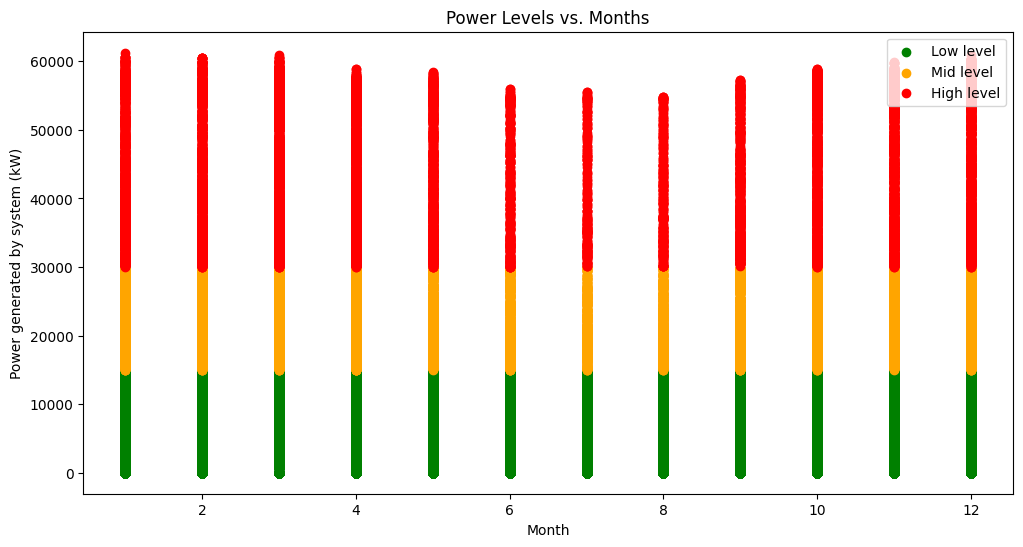

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/sample_data/AL_WIND_07_12.xlsx')

# Function to classify power levels based on custom thresholds
def classify_power_level(power):
    if power <= 15000:
        return 'Low level'
    elif power <= 30000:
        return 'Mid level'
    else:
        return 'High level'

# Create a new 'Month' column from 'DateTime'
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Month'] = df['DateTime'].dt.month

# Apply the classification function to create 'Power level' column
df['Power level'] = df['Power_generated_by_system (kW)'].apply(classify_power_level)

# Plot the graph
plt.figure(figsize=(12, 6))
colors = {'Low level': 'green', 'Mid level': 'orange', 'High level': 'red'}
for level, color in colors.items():
    level_data = df[df['Power level'] == level]
    plt.scatter(level_data['Month'], level_data['Power_generated_by_system (kW)'], label=level, color=color)


# Add legend at upper right
plt.legend(loc='upper right')

plt.title('Power Levels vs. Months')
plt.xlabel('Month')
plt.ylabel('Power generated by system (kW)')
plt.show()


In [ ]:
# Save the trained model
cnn_model.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/cnn_model.h5')  # Load your trained model

# Input loop
while True:
    try:
        # Get user input for power generated
        power_generated = float(input("Enter the power generated by the system (kW): "))

        # Normalize the input data
        scaler = StandardScaler()
        power_generated_scaled = scaler.fit_transform(np.array(power_generated).reshape(-1, 1))
        power_generated_image = power_generated_scaled.reshape(1, 1, 1, 1)

        # Predict the power level
        prediction = cnn_model.predict(power_generated_image)
        power_level = classify_power_level(power_generated)

        # Print the prediction
        print(f"The predicted power level for {power_generated} kW is: {power_level}")

    except ValueError:
        print("Please enter a valid number.")
    except KeyboardInterrupt:
        print("\nExiting...")
        break


Enter the power generated by the system (kW): 57000
1/1 [==============================] - 0s 82ms/step
The predicted power level for 57000.0 kW is: High level
Enter the power generated by the system (kW): 900
1/1 [==============================] - 0s 21ms/step
The predicted power level for 900.0 kW is: Low level
Enter the power generated by the system (kW): 25000
1/1 [==============================] - 0s 19ms/step
The predicted power level for 25000.0 kW is: Mid level
Enter the power generated by the system (kW): 29000
1/1 [==============================] - 0s 27ms/step
The predicted power level for 29000.0 kW is: Mid level

Exiting...


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/sample_data/wind_mill_dataset.xlsx',index_col="DateTime")

# Display the first few rows of the dataset
print(df.head())


                     Air_temperature (c)  Pressure (atm)  Wind_speed (m/s)  \
DateTime                                                                     
2022-01-01 06:25:08                   46        1.566323          7.821116   
2022-01-01 19:07:48                   47        0.244996          2.451113   
2022-01-01 14:35:28                   26        1.269813         13.170429   
2022-01-01 10:47:12                   22        0.247692          1.427477   
2022-01-01 07:29:58                   23        0.141071          2.763579   

                     Wind_direction (deg)  Power_generated_by_system (kW)  
DateTime                                                                   
2022-01-01 06:25:08                   110                     1575.282483  
2022-01-01 19:07:48                   209                     2709.400866  
2022-01-01 14:35:28                     0                      456.224207  
2022-01-01 10:47:12                    57                     3394.727121

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
# Save the trained model
cnn_model.save('new_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# prompt: i want to give input prompt for "Power_generated_by_system (kW)", so the trained cnn_model will shows the output as classified power level

import numpy as np
# Load the trained CNN model
model = load_model('/content/new_cnn_model.h5')  # Load your trained model

# Input loop
while True:
    try:
        # Get user input for power generated
        power_generated = float(input("Enter the power generated by the system (kW): "))

        # Normalize the input data
        scaler = StandardScaler()
        power_generated_scaled = scaler.fit_transform(np.array(power_generated).reshape(-1, 1))
        power_generated_image = power_generated_scaled.reshape(1, 4, 1, 1)

        # Predict the power level
        prediction = cnn_model.predict(power_generated_image)
        power_level = classify_power_level(power_generated)

        # Print the prediction
        print(f"The predicted power level for {power_generated} kW is: {power_level}")

    except ValueError:
        print("Please enter a valid number.")
    except KeyboardInterrupt:
        print("\nExiting...")
        break


Enter the power generated by the system (kW): 500
Please enter a valid number.

Exiting...


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
# Load the trained CNN model
model = load_model('/content/new_cnn_model.h5')
# Create and fit the label encoder
label_encoder = LabelEncoder()
y = df['Power_generated_by_system (kW)']
label_encoder.fit(y)

# Save the label encoder classes
np.save('label_encoder_classes.npy', label_encoder.classes_)

while True:
    # Input prompt for power_generated_by_the_system (kW)
    power_generated = float(input("Enter power generated by the system (kW): "))

    # Standardize the input feature
    scaler = StandardScaler()
    power_generated_scaled = scaler.fit_transform([[power_generated]])

    # Reshape the input data for the CNN model
    power_generated_reshaped = power_generated_scaled.reshape(1, 1, 1)

    # Pad the reshaped input to match the expected shape (None, 4, 1)
    power_generated_padded = np.pad(power_generated_reshaped, [(0, 0), (3, 0), (0, 0)], mode='constant')

    # Predict the power level
    prediction = cnn_model.predict(power_generated_padded)
    predicted_class = np.argmax(prediction)
    power_level = label_encoder.inverse_transform([predicted_class])[0]

    print(f"Predicted power level: {power_level}")


In [ ]:

while True:
    # Input prompt for power_generated_by_the_system (kW)
    power_generated = float(input("Enter power generated by the system (kW): "))

    # Standardize the input feature
    scaler = StandardScaler()
    power_generated_scaled = scaler.fit_transform([[power_generated]])

    # Reshape the input data for the CNN model
    power_generated_reshaped = power_generated_scaled.reshape(1, 1, 1)

    # Pad the reshaped input to match the expected shape (None, 4, 1)
    power_generated_padded = np.pad(power_generated_reshaped, [(0, 0), (3, 0), (0, 0)], mode='constant')

    # Predict the power level
    predicted_class = np.argmax(cnn_model.predict(power_generated_padded))

    # Display the classified power level
    print(f"Classified power level: {'low' if predicted_class == 0 else 'mid' if predicted_class == 1 else 'high'}")

Enter power generated by the system (kW): 90
1/1 [==============================] - 0s 26ms/step
Classified power level: low
Enter power generated by the system (kW): 9000
1/1 [==============================] - 0s 27ms/step
Classified power level: low


KeyboardInterrupt: Interrupted by user